In [ ]:
!nvidia-smi

Sun Jun 12 12:30:50 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
# Load fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

# Normalize intensities between 0 and 1
train_X = train_X / 255.0
test_X = test_X / 255.0

# Y=1(Trouser), Y=4(Coat), Y=7(Sneaker), Y=8(Bag) 선택
train_X=train_X[(train_Y==1) | (train_Y==4) | (train_Y==7) | (train_Y==8)]
train_Y=train_Y[(train_Y==1) | (train_Y==4) | (train_Y==7) | (train_Y==8)]
test_X=test_X[(test_Y==1) | (test_Y==4) | (test_Y==7) | (test_Y==8)]
test_Y=test_Y[(test_Y==1) | (test_Y==4) | (test_Y==7) | (test_Y==8)]

# 라벨 변경
train_Y[train_Y==1]=0
train_Y[train_Y==4]=1
train_Y[train_Y==7]=2
train_Y[train_Y==8]=3
test_Y[test_Y==1]=0
test_Y[test_Y==4]=1
test_Y[test_Y==7]=2
test_Y[test_Y==8]=3

print(train_X.shape, train_Y.shape)
print(test_X.shape, test_Y.shape)

(24000, 28, 28) (24000,)
(4000, 28, 28) (4000,)


In [ ]:
# Convert labels
train_Yc = tf.keras.utils.to_categorical(train_Y, num_classes=4)
test_Yc = tf.keras.utils.to_categorical(test_Y, num_classes=4)

In [ ]:
# Display labels
print(train_Y[1],train_Yc[1])
print(train_Y[5],train_Yc[5])

2 [0. 0. 1. 0.]
1 [0. 1. 0. 0.]


In [ ]:
# Display dimensions
print(train_X.shape, test_X.shape)

(60000, 28, 28) (10000, 28, 28)


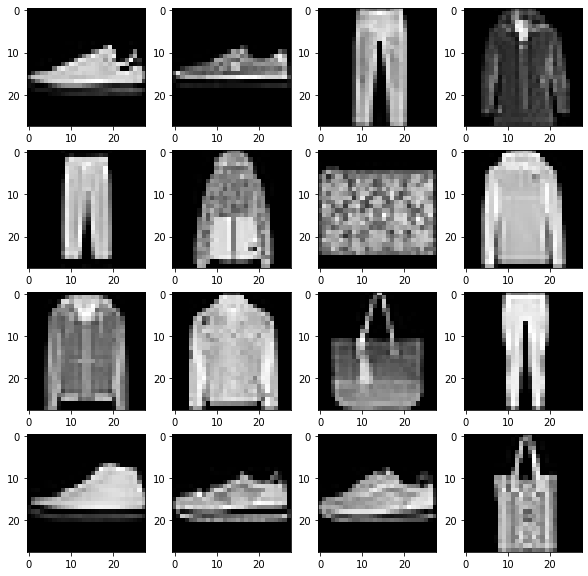

In [ ]:
# Convert labels
train_Yc = tf.keras.utils.to_categorical(train_Y, num_classes=4)
test_Yc = tf.keras.utils.to_categorical(test_Y, num_classes=4)

# Display images
plt.figure(figsize=(10, 10))
for c in range(16):
  plt.subplot(4,4,c+1)
  plt.imshow(train_X[c].reshape(28,28), cmap='gray')
plt.show()

In [ ]:
# Model building
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(units=128, activation='relu'),
  tf.keras.layers.Dense(units=64, activation='relu'),
  tf.keras.layers.Dense(units=32, activation='relu'),
  tf.keras.layers.Dense(units=4)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 4)                 132       
                                                                 
Total params: 110,948
Trainable params: 110,948
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(5,5),strides=(1, 1), padding='same', filters=20),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
  tf.keras.layers.Conv2D(kernel_size=(5,5),strides=(1, 1), padding='same', filters=50),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units=500),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Dense(units=4),
  tf.keras.layers.Softmax()
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 20)        520       
                                                                 
 activation_13 (Activation)  (None, 28, 28, 20)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 20)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 50)        25050     
                                                                 
 activation_14 (Activation)  (None, 14, 14, 50)        0         
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 7, 7, 50)         0         
 g2D)                                                 

In [ ]:
# Train model
model.compile(optimizer=tf.keras.optimizers.Adam(),
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

history = model.fit(train_X, train_Y, batch_size=36, epochs=10, validation_split=0.25)

Epoch 1/10
500/500 [==============================] - 13s 4ms/step - loss: 0.0674 - accuracy: 0.9801 - val_loss: 0.0311 - val_accuracy: 0.9900
Epoch 2/10
500/500 [==============================] - 2s 4ms/step - loss: 0.0271 - accuracy: 0.9914 - val_loss: 0.0240 - val_accuracy: 0.9923
Epoch 3/10
500/500 [==============================] - 2s 4ms/step - loss: 0.0144 - accuracy: 0.9956 - val_loss: 0.0238 - val_accuracy: 0.9923
Epoch 4/10
500/500 [==============================] - 2s 4ms/step - loss: 0.0126 - accuracy: 0.9958 - val_loss: 0.0404 - val_accuracy: 0.9893
Epoch 5/10
500/500 [==============================] - 2s 4ms/step - loss: 0.0077 - accuracy: 0.9976 - val_loss: 0.0203 - val_accuracy: 0.9943
Epoch 6/10
500/500 [==============================] - 2s 4ms/step - loss: 0.0038 - accuracy: 0.9987 - val_loss: 0.0243 - val_accuracy: 0.9943
Epoch 7/10
500/500 [==============================] - 2s 4ms/step - loss: 0.0078 - accuracy: 0.9976 - val_loss: 0.0190 - val_accuracy: 0.9943
Epoch

In [ ]:
# Setting for training
model.compile(optimizer=tf.keras.optimizers.SGD(),
  loss='mean_squared_error',
  metrics=['accuracy'])

# Training
history = model.fit(train_X, train_Yc, batch_size=36, epochs=10)

Epoch 1/10
667/667 [==============================] - 3s 3ms/step - loss: 0.0481 - accuracy: 0.9395
Epoch 2/10
667/667 [==============================] - 2s 3ms/step - loss: 0.0266 - accuracy: 0.9734
Epoch 3/10
667/667 [==============================] - 2s 3ms/step - loss: 0.0224 - accuracy: 0.9783
Epoch 4/10
667/667 [==============================] - 2s 3ms/step - loss: 0.0200 - accuracy: 0.9809
Epoch 5/10
667/667 [==============================] - 2s 3ms/step - loss: 0.0183 - accuracy: 0.9827
Epoch 6/10
667/667 [==============================] - 2s 3ms/step - loss: 0.0170 - accuracy: 0.9840
Epoch 7/10
667/667 [==============================] - 2s 3ms/step - loss: 0.0160 - accuracy: 0.9847
Epoch 8/10
667/667 [==============================] - 2s 3ms/step - loss: 0.0152 - accuracy: 0.9860
Epoch 9/10
667/667 [==============================] - 2s 3ms/step - loss: 0.0145 - accuracy: 0.9864
Epoch 10/10
667/667 [==============================] - 2s 3ms/step - loss: 0.0138 - accuracy: 0.9867

In [ ]:
# Training
history = model.fit(train_X, train_Yc, batch_size=36, epochs=10)

Epoch 1/10
1667/1667 [==============================] - 7s 3ms/step - loss: 0.0639 - accuracy: 0.6154
Epoch 2/10
1667/1667 [==============================] - 4s 3ms/step - loss: 0.0480 - accuracy: 0.7392
Epoch 3/10
1667/1667 [==============================] - 4s 3ms/step - loss: 0.0434 - accuracy: 0.7692
Epoch 4/10
1667/1667 [==============================] - 4s 3ms/step - loss: 0.0407 - accuracy: 0.7861
Epoch 5/10
1667/1667 [==============================] - 4s 3ms/step - loss: 0.0387 - accuracy: 0.7969
Epoch 6/10
1667/1667 [==============================] - 4s 3ms/step - loss: 0.0372 - accuracy: 0.8047
Epoch 7/10
1667/1667 [==============================] - 4s 3ms/step - loss: 0.0360 - accuracy: 0.8106
Epoch 8/10
1667/1667 [==============================] - 4s 3ms/step - loss: 0.0349 - accuracy: 0.8156
Epoch 9/10
1667/1667 [==============================] - 4s 3ms/step - loss: 0.0341 - accuracy: 0.8192
Epoch 10/10
1667/1667 [==============================] - 4s 3ms/step - loss: 0.033

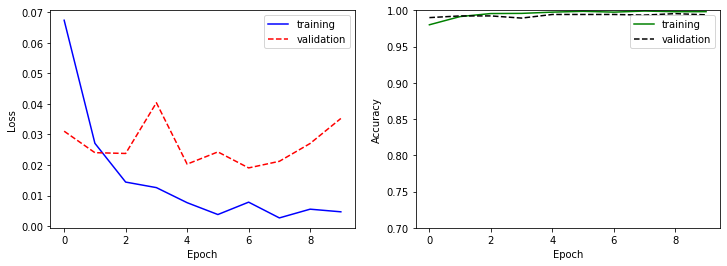

In [ ]:
# Show training history
plt.figure(figsize=(12, 4)), plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='training')
plt.plot(history.history['val_loss'], 'r--', label='validation')
plt.xlabel('Epoch'), plt.ylabel('Loss'), plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='training')
plt.plot(history.history['val_accuracy'], 'k--', label='validation')
plt.xlabel('Epoch'), plt.ylabel('Accuracy'), plt.ylim(0.7, 1), plt.legend()
plt.show()


In [ ]:
# Evaluate the model using the test dataset
model.evaluate(test_X, test_Y, verbose=False)

[0.023696087300777435, 0.9937499761581421]

In [ ]:
# Test using the whole test dataset
model.evaluate(test_X, test_Yc)

ValueError: ignored

2 [[ 0.03033857  0.03989057  0.95442444 -0.02450839]]


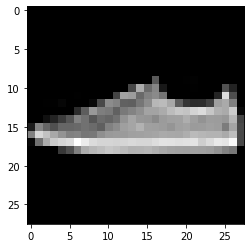

In [ ]:
# Test using a single image
img = test_X[70]
pred = model.predict(tf.expand_dims(img, axis=0))
plt.imshow(img,'gray')
print(test_Y[70], pred)

0 [[ 1.1003165   0.00193089 -0.05217033 -0.04017585]]


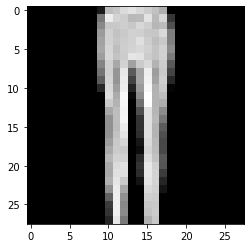

In [ ]:
# Test using a single image
img = test_X[58]
pred = model.predict(tf.expand_dims(img, axis=0))
plt.imshow(img,'gray')
print(test_Y[58], pred)

1 [[ 0.03181293  0.9122936  -0.02919214  0.03591373]]


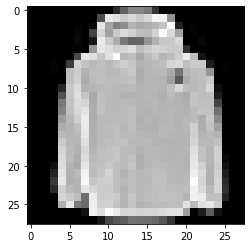

In [ ]:
# Test using a single image
img = test_X[74]
pred = model.predict(tf.expand_dims(img, axis=0))
plt.imshow(img,'gray')
print(test_Y[74], pred)

3 [[ 0.21821128 -0.08268772  0.1576465   0.93280745]]


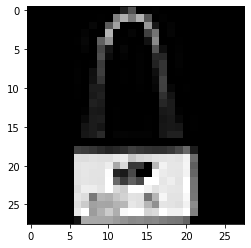

In [ ]:
# Test using a single image
img = test_X[89]
pred = model.predict(tf.expand_dims(img, axis=0))
plt.imshow(img,'gray')
print(test_Y[89], pred)

In [ ]:
import numpy as np

0 [[1.0000000e+00 2.6729587e-09 8.3076476e-14 4.4369258e-11]]


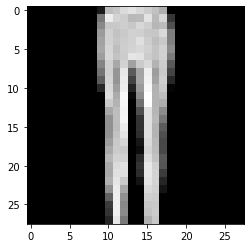

In [ ]:
img = test_X[58]
pre_img = tf.expand_dims(img, axis=0)
pred = model.predict(pre_img)
plt.imshow(img,'gray')
print(test_Y[58],pred)

1 [[5.0187003e-07 9.9979132e-01 5.3703308e-09 2.0825835e-04]]


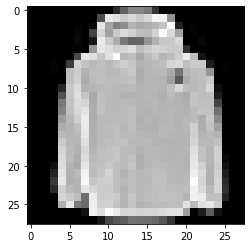

In [ ]:
img = test_X[74]
pre_img = tf.expand_dims(img, axis=0)
pred = model.predict(pre_img)
plt.imshow(img,'gray')
print(test_Y[74],pred)

2 [[2.4665145e-10 1.2429582e-09 1.0000000e+00 1.3370040e-09]]


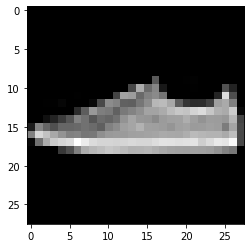

In [ ]:
img = test_X[70]
pre_img = tf.expand_dims(img, axis=0)
pred = model.predict(pre_img)
plt.imshow(img,'gray')
print(test_Y[70],pred)

3 [[5.5427361e-11 4.9179433e-10 2.2082363e-08 1.0000000e+00]]


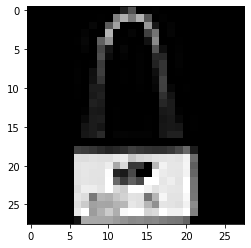

In [ ]:
img = test_X[89]
pre_img = tf.expand_dims(img, axis=0)
pred = model.predict(pre_img)
plt.imshow(img,'gray')
print(test_Y[89],pred)

In [ ]:
from google.colab.patches import cv_imshow

In [ ]:
# Load CIFAR-10 Dataset
(train_X, train_Y), (test_X, test_Y) = tf.keras.datasets.cifar10.load_data()
print('before',train_X.shape, test_X.shape)

# Y=0(airplane), Y=1(automobile), Y=8(ship) 선택
train_X=train_X[((train_Y==0) | (train_Y==1)| (train_Y==8)).ravel()]
train_Y=train_Y[((train_Y==0) | (train_Y==1)| (train_Y==8)).ravel()]
test_X=test_X[((test_Y==0) | (test_Y==1) | (test_Y==8)).ravel()]
test_Y=test_Y[((test_Y==0) | (test_Y==1) | (test_Y==8)).ravel()]

# 라벨 변경
train_Y[(train_Y==0).ravel()]=0
train_Y[(train_Y==1).ravel()]=1
train_Y[(train_Y==8).ravel()]=2
test_Y[(test_Y==0).ravel()]=0
test_Y[(test_Y==1).ravel()]=1
test_Y[(test_Y==8).ravel()]=2

print('after', train_X.shape, train_Y.shape)
print(test_X.shape, test_Y.shape)

before (50000, 32, 32, 3) (10000, 32, 32, 3)
after (15000, 32, 32, 3) (15000, 1)
(3000, 32, 32, 3) (3000, 1)


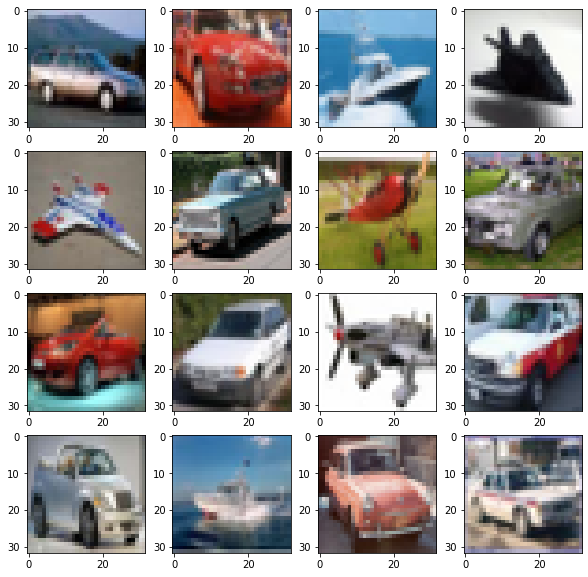

[[1 1 2 0 0 1 0 1 1 1 0 1 1 2 1 1]]


In [ ]:
# Display
plt.figure(figsize=(10, 10))
for c in range(16):
  plt.subplot(4,4,c+1)
  plt.imshow(train_X[c])
plt.show()
print(train_Y[:16].T)

# Preprocessing
train_X = tf.keras.applications.vgg16.preprocess_input(train_X)
test_X = tf.keras.applications.vgg16.preprocess_input(test_X)

In [ ]:
# Build a new model using VGG16 (Functional API)
base_model = tf.keras.applications.VGG16(input_shape=[32,32,3],include_top=False, weights='imagenet')
x = base_model.output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
predictions = tf.keras.layers.Dense(3, activation='softmax')(x)
model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
# Freeze pretrained layers
for layer in model.layers[:19]:
  layer.trainable = False
for layer in model.layers[19:]:
  layer.trainable = True

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
# Train model
model.compile(optimizer=tf.keras.optimizers.Adam(),loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_X, train_Y, batch_size=36, epochs=10, validation_split=0.25)

Epoch 1/10
313/313 [==============================] - 6s 15ms/step - loss: 1.3857 - accuracy: 0.7636 - val_loss: 0.6422 - val_accuracy: 0.8032
Epoch 2/10
313/313 [==============================] - 4s 13ms/step - loss: 0.4365 - accuracy: 0.8450 - val_loss: 0.5476 - val_accuracy: 0.8229
Epoch 3/10
313/313 [==============================] - 4s 13ms/step - loss: 0.2991 - accuracy: 0.8877 - val_loss: 0.5303 - val_accuracy: 0.8221
Epoch 4/10
313/313 [==============================] - 4s 13ms/step - loss: 0.2291 - accuracy: 0.9121 - val_loss: 0.5174 - val_accuracy: 0.8304
Epoch 5/10
313/313 [==============================] - 4s 13ms/step - loss: 0.1807 - accuracy: 0.9336 - val_loss: 0.5392 - val_accuracy: 0.8384
Epoch 6/10
313/313 [==============================] - 4s 13ms/step - loss: 0.1493 - accuracy: 0.9460 - val_loss: 0.5842 - val_accuracy: 0.8355
Epoch 7/10
313/313 [==============================] - 4s 13ms/step - loss: 0.1180 - accuracy: 0.9575 - val_loss: 0.6298 - val_accuracy: 0.8336

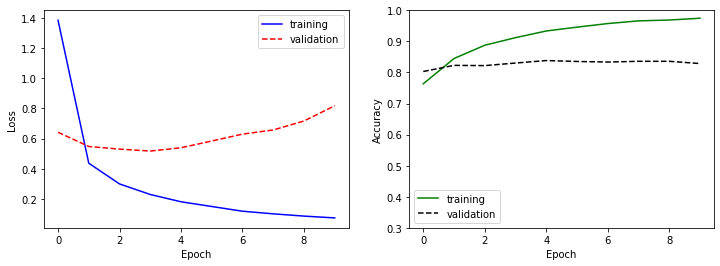

In [ ]:
# Show training history
plt.figure(figsize=(12, 4)), plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='training')
plt.plot(history.history['val_loss'], 'r--', label='validation')
plt.xlabel('Epoch'), plt.ylabel('Loss'), plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='training')
plt.plot(history.history['val_accuracy'], 'k--', label='validation')
plt.xlabel('Epoch'), plt.ylabel('Accuracy'), plt.ylim(0.3, 1), plt.legend()
plt.show()

In [ ]:
# Evaluate the model using the test dataset
model.evaluate(test_X, test_Y, verbose=False)

[0.8182389140129089, 0.82833331823349]

In [ ]:
# Unfreeze the whole network
for layer in model.layers:
  layer.trainable = True

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
# Train model
model.compile(optimizer=tf.keras.optimizers.Adam(),loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_X, train_Y, batch_size=36, epochs=10, validation_split=0.25)

Epoch 1/10
313/313 [==============================] - 15s 36ms/step - loss: 1.4813 - accuracy: 0.4941 - val_loss: 0.8677 - val_accuracy: 0.5597
Epoch 2/10
313/313 [==============================] - 10s 32ms/step - loss: 0.6740 - accuracy: 0.6784 - val_loss: 0.5462 - val_accuracy: 0.7493
Epoch 3/10
313/313 [==============================] - 10s 32ms/step - loss: 0.4825 - accuracy: 0.7997 - val_loss: 0.3419 - val_accuracy: 0.8691
Epoch 4/10
313/313 [==============================] - 10s 32ms/step - loss: 0.3560 - accuracy: 0.8604 - val_loss: 0.3550 - val_accuracy: 0.8579
Epoch 5/10
313/313 [==============================] - 10s 33ms/step - loss: 0.3494 - accuracy: 0.8632 - val_loss: 0.3785 - val_accuracy: 0.8587
Epoch 6/10
313/313 [==============================] - 10s 33ms/step - loss: 0.2540 - accuracy: 0.9064 - val_loss: 0.4230 - val_accuracy: 0.8347
Epoch 7/10
313/313 [==============================] - 10s 33ms/step - loss: 0.2439 - accuracy: 0.9083 - val_loss: 0.3112 - val_accuracy:

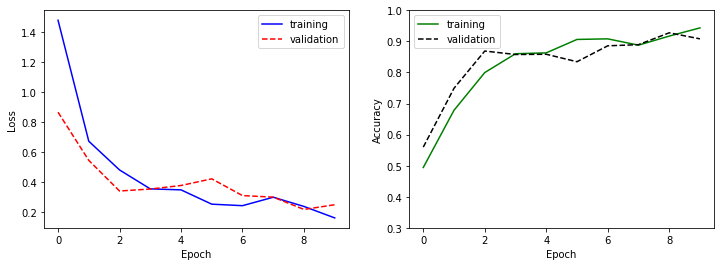

In [ ]:
# Show training history
plt.figure(figsize=(12, 4)), plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='training')
plt.plot(history.history['val_loss'], 'r--', label='validation')
plt.xlabel('Epoch'), plt.ylabel('Loss'), plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='training')
plt.plot(history.history['val_accuracy'], 'k--', label='validation')
plt.xlabel('Epoch'), plt.ylabel('Accuracy'), plt.ylim(0.3, 1), plt.legend()
plt.show()

In [ ]:
# Evaluate the model using the test dataset
model.evaluate(test_X, test_Y, verbose=False)

[0.24951688945293427, 0.9086666703224182]